# Add some text !

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
from importlib import reload
import prince

from src.data import data_loading
from src.visualization import variables_relationship as vr
from src.visualization import dissimilarity, loading_analysis


In [122]:
reload(data_loading)
file=pathlib.Path(r"./data/Dataset001_20230317.xlsx")
dataset=data_loading.load_precision_dataset(file)
target="Réponse: Erreur Laterale"
dataset

,Case ID,Site,Operator,Organ,Procedure Type,Traj Insertion Sequence,Needle Type,Needle Calibrated Length,Respiration Management,Skin Incision,...,Planned Organ Entry Angle,Planned Length In Patient,Planned Length In Organ,Planned Distance to Bones Structure,Planned Distance Skin to Muscle Layer,Planning Orbital Angle,Planning Cranial Angle,Planned Trajectory Length,Distance Needle Guide/Skin at insertion,Réponse: Erreur Laterale
0,94,HEH,Mastier,Kidney,Cryo,1,IceSphere 1.5 CX 90°,175.0,Jet,Yes,...,49.600463,134.600000,29.800000,30.799995,40.0,62.542503,-0.086760,132.115177,-34.856133,4.325167
1,94,HEH,Mastier,Kidney,Cryo,2,IceSphere 1.5 CX 90°,175.0,Jet,Yes,...,61.400282,136.600000,40.000000,25.318714,30.0,60.281449,0.254741,135.052619,22.310925,7.777303
2,95,HEH,Gay,Liver,MWA,1,Surgnova 1531C,150.0,Jet,Yes,...,52.675073,119.200000,49.600000,45.752705,44.3,-58.389202,-13.192905,117.034012,14.216608,27.081326
3,100,IGR,Deschamps,Liver,MWA,1,Surgnova 2031C,200.0,Jet,Yes,...,47.767174,145.000000,92.800000,4.925741,39.4,18.736635,8.367110,145.618474,1.205840,9.051402
4,100,IGR,Deschamps,Liver,MWA,2,Surgnova 1531C,150.0,Jet,Yes,...,48.253376,117.200000,67.000000,3.735674,28.9,-0.202279,12.491246,116.004052,-14.034852,15.140525
5,101,HEH,Pagnoux,Kidney,Cryo,1,IceRod 1.5 CX 90°,175.0,Jet,Yes,...,54.636093,114.400000,34.200000,14.117520,20.0,20.294772,12.068787,107.568397,49.673633,5.671667
6,102,HEH,L'Huillier,Liver,MWA,1,Surgnova 1531C,150.0,Jet,Yes,...,46.312035,90.600000,48.200000,6.964244,14.8,88.026003,24.658566,88.192120,30.209389,10.837196
7,102,HEH,L'Huillier,Liver,MWA,2,Surgnova 1531C,150.0,Jet,Yes,...,5.293640,80.800000,28.200000,1.821718,14.3,55.391362,0.287981,79.633724,37.578836,6.527686
8,103,IGR,De Baere,Kidney,Cryo,1,IceRod 1.5 CX 90°,174.5,Apnea,No,...,46.797838,103.800000,26.200000,2.069454,25.0,3.906556,7.023052,107.933452,57.475329,14.451030
9,103,IGR,De Baere,Kidney,Cryo,2,IceRod 1.5 CX 90°,174.5,Apnea,No,...,60.443121,107.200000,39.600000,5.060262,25.0,1.864785,-2.236211,107.635728,39.807202,14.161013


# Descriptive analysis of data

List of data type

In [13]:
dataset.dtypes

Case ID                                           object
Site                                              object
Operator                                          object
Organ                                             object
Procedure Type                                    object
Traj Insertion Sequence                            int64
Needle Type                                       object
Needle Calibrated Length                         float64
Respiration Management                            object
Skin Incision                                     object
Use of Axial Handguiding                          object
Time Between Planning Image and Control Image      int64
Planned Skin Entry Angle                         float64
Planned Organ Entry Angle                        float64
Planned Length In Patient                        float64
Planned Length In Organ                          float64
Planned Distance to Bones Structure              float64
Planned Distance Skin to Muscle

In [148]:
dataset.select_dtypes(object).apply(pd.Series.nunique)

Case ID                     34
Site                         3
Operator                    14
Organ                        3
Procedure Type               5
Needle Type                 11
Respiration Management       2
Skin Incision                2
Use of Axial Handguiding     2
dtype: int64

<AxesSubplot: >

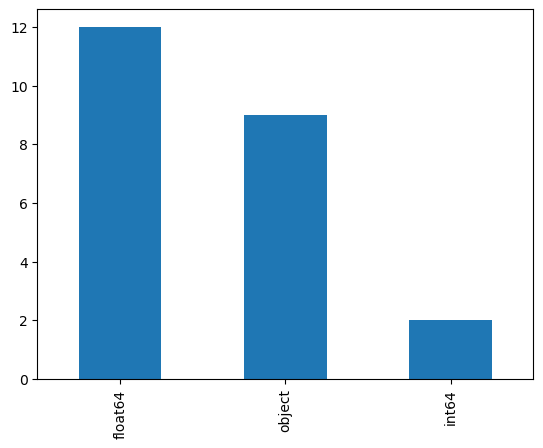

In [24]:
pd.value_counts(dataset.dtypes).plot.bar()

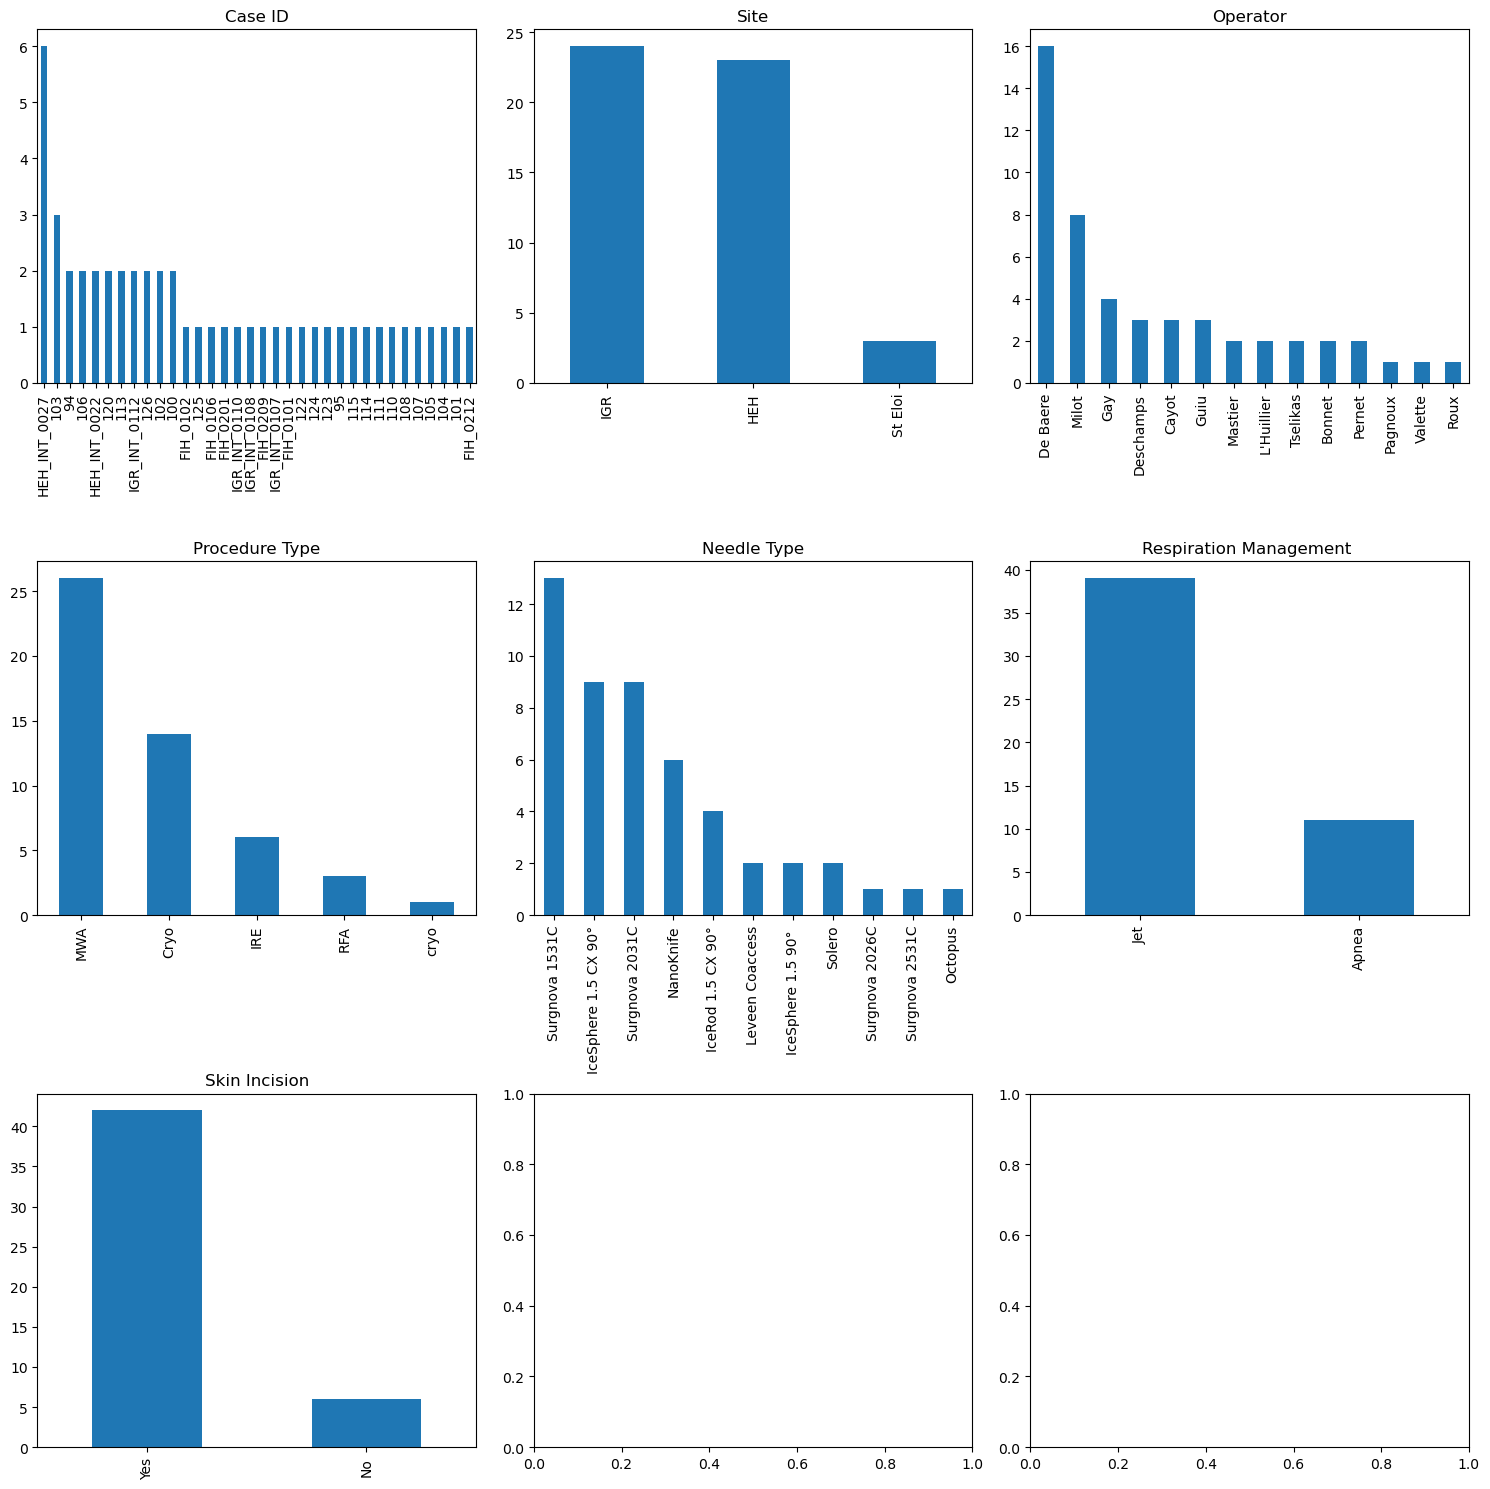

In [131]:
list_variables=["Case ID","Site","Operator","Procedure Type","Needle Type","Respiration Management ","Skin Incision"]

nb_axes=int(np.ceil(np.sqrt(len(list_variables))))
fig,axes=plt.subplots(nb_axes,nb_axes,figsize=(15,15))
ax=axes.ravel()
for n,v in enumerate(list_variables):
    dataset[v].value_counts().plot(kind="bar",ax=ax[n])
    ax[n].set_title(v)
plt.tight_layout()

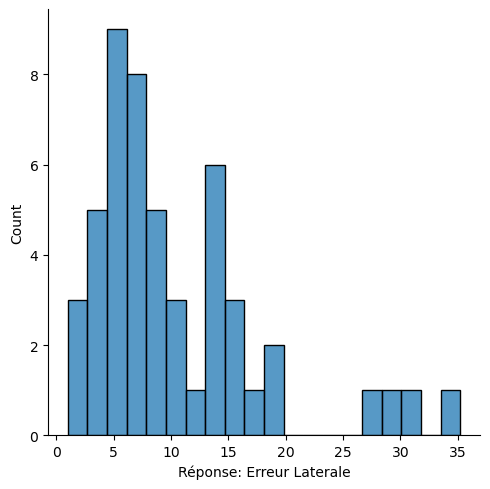

In [228]:
sns.displot(dataset[target],bins=20)
plt.show()

## Variables relation to each other

We can't use "normal" correlation approaches due to categorical & numerical variables.
Hence the use of the **Dython** package that allow to perform:

- Correlation for numerical/numerical
- Cramer V score for nominal/nominal
- Correlation ratio for nominal/numerical

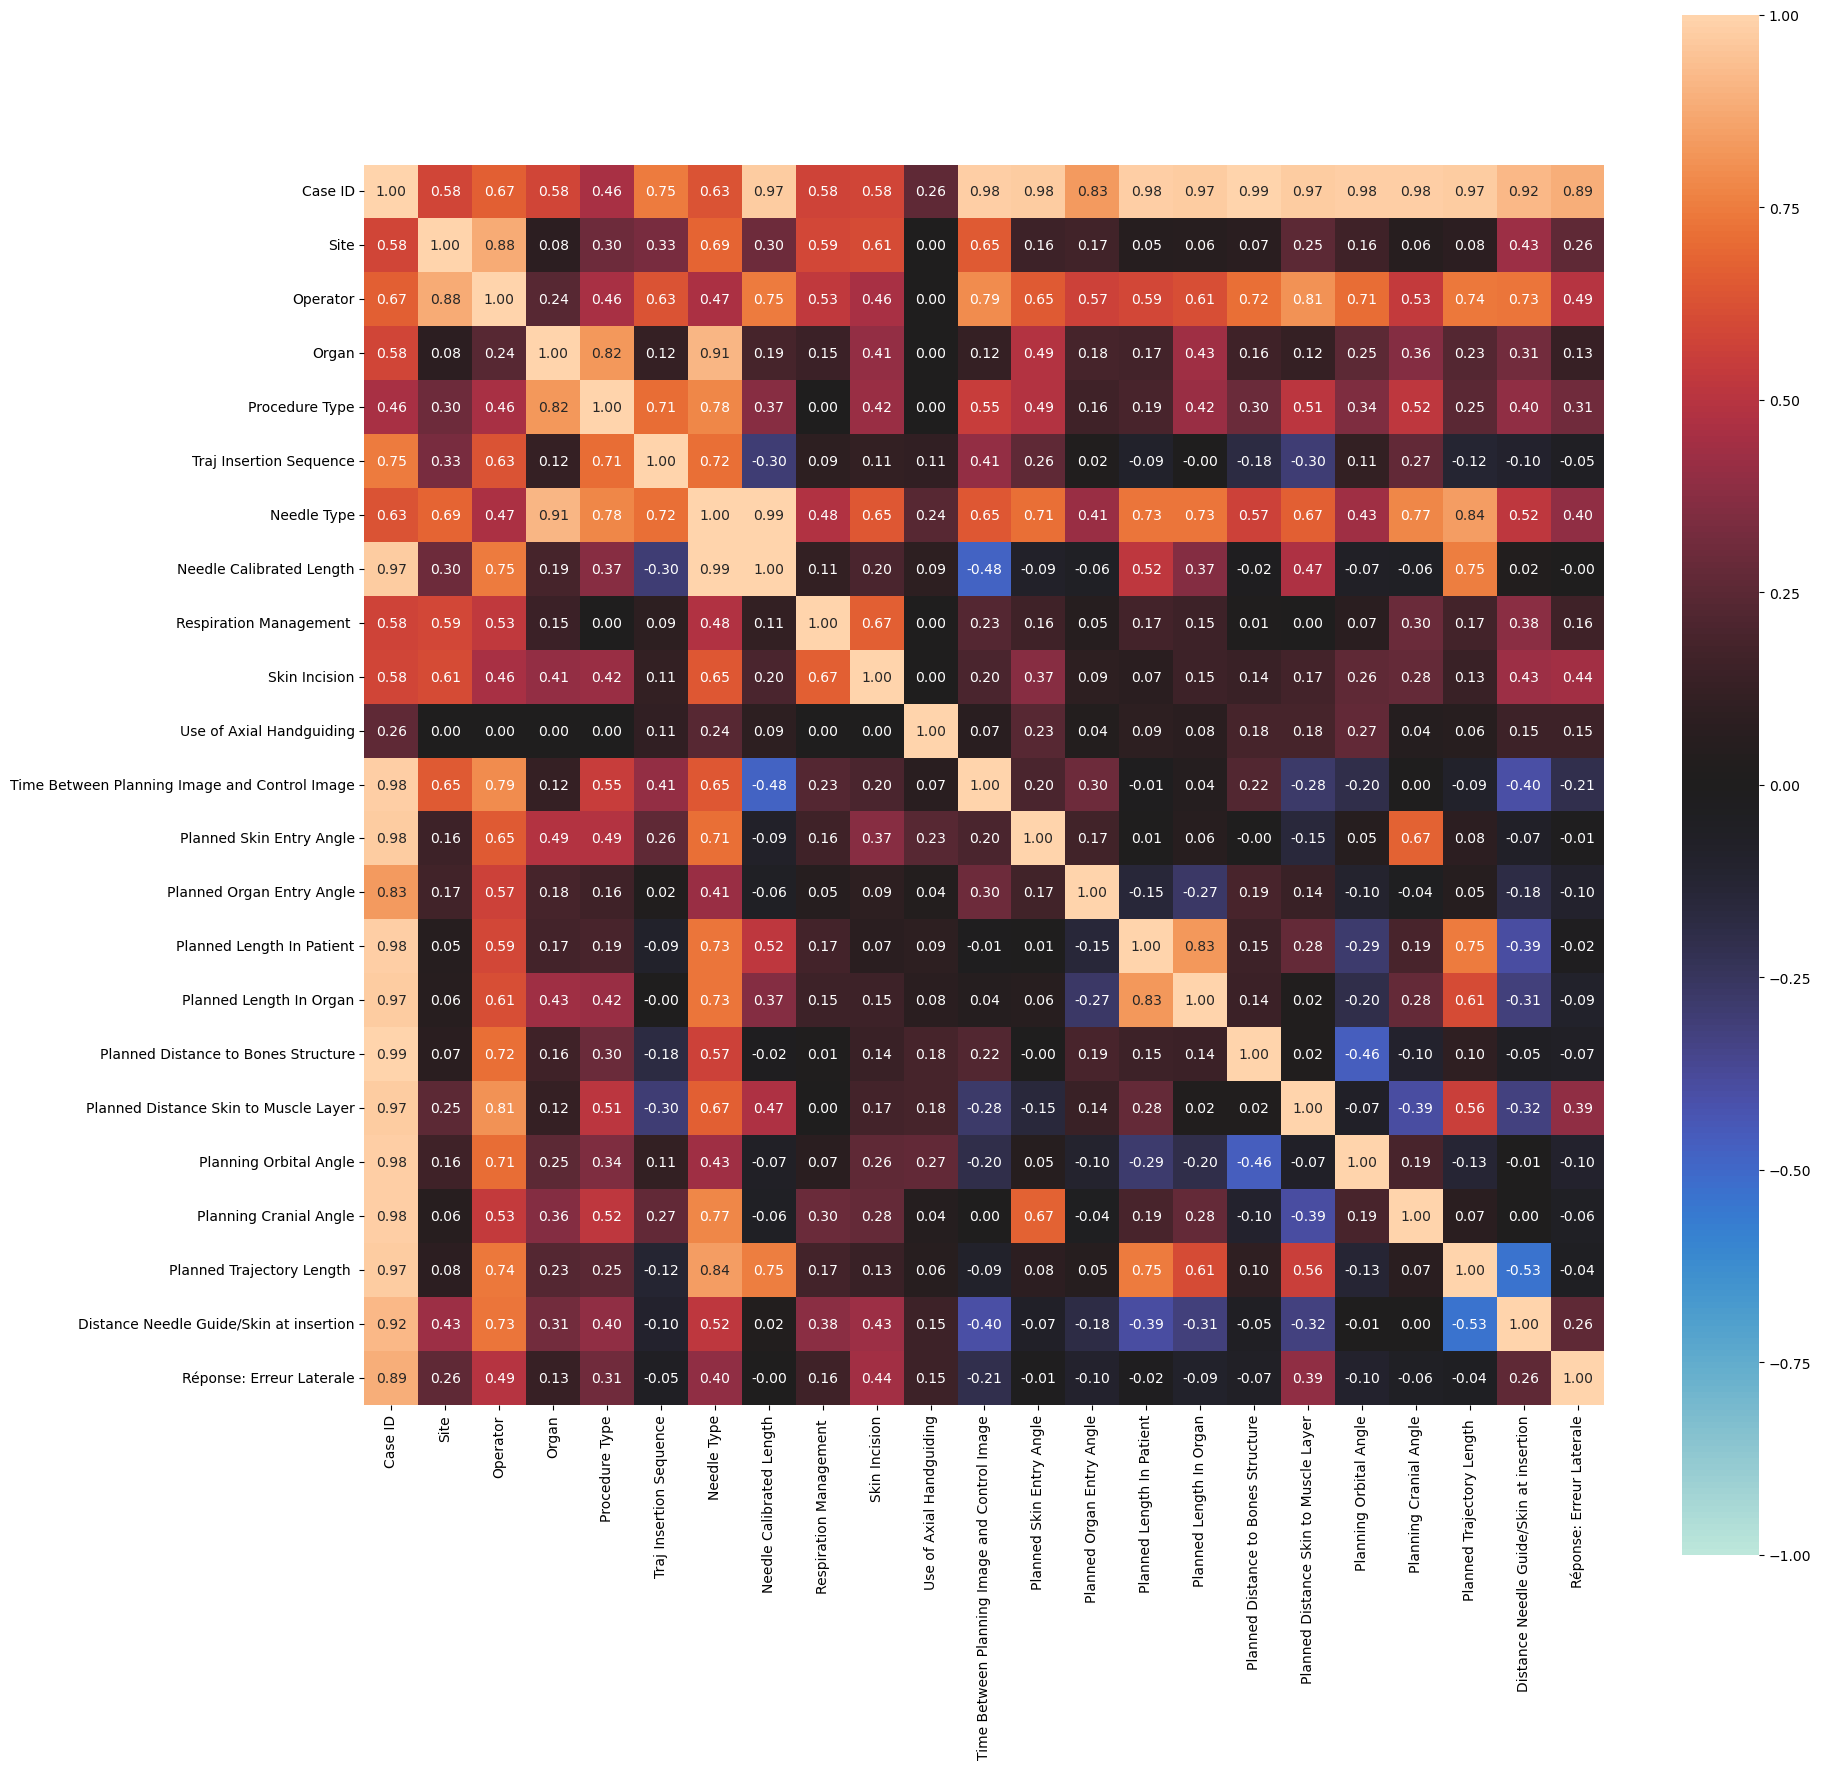

In [42]:
from dython import nominal
relation_matrix=nominal.associations(dataset,figsize=(20,20),clustering=False)["corr"]

Categories with a lot of cardinality tends to be related to some other variables .... You will probably come back to this graph later on

## Dendrogram of the varibales based on this matrix

This allow to view which variables are close to which variables

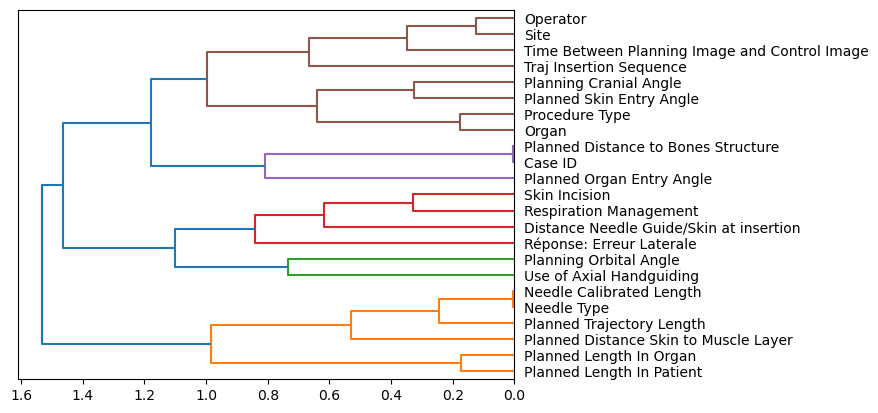

c:\Users\rboni\miniconda3\envs\Accuracy_analysis\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


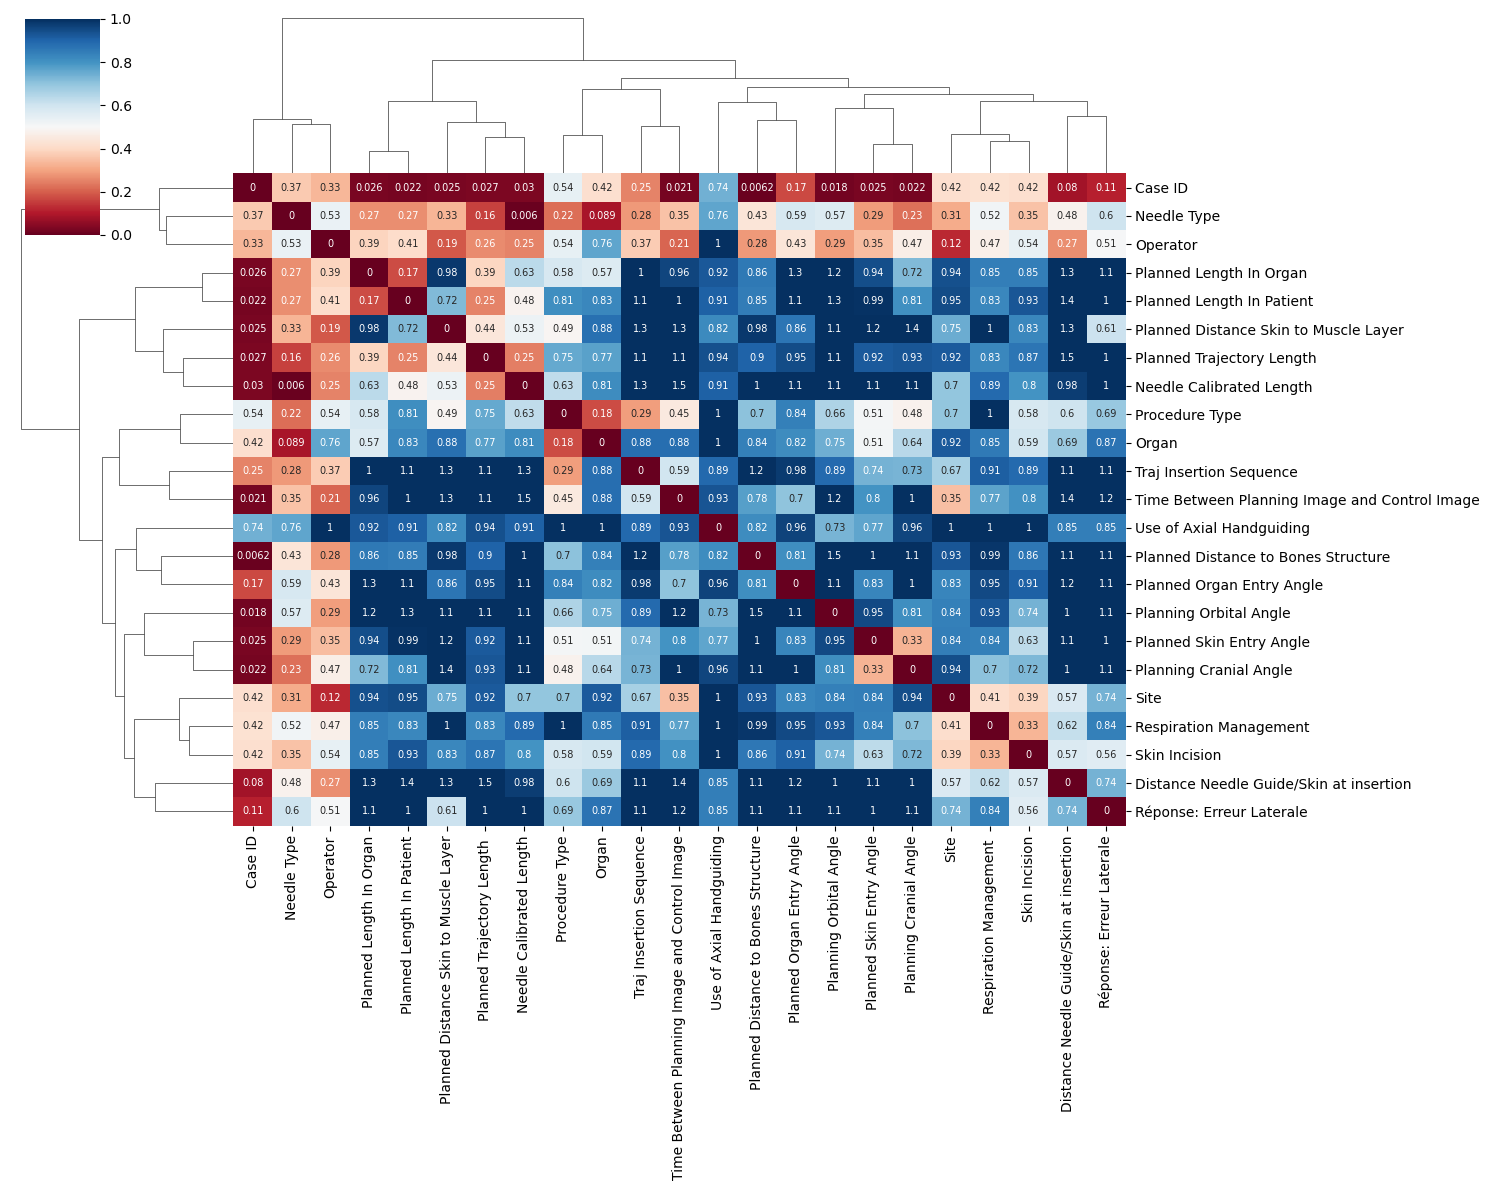

In [253]:
reload(vr)
reload(dissimilarity)
mydiss = dissimilarity.dython_dissimilarity
vr.make_dendrogram(dataset, mydiss)

vr.make_clustergraph(dataset, 0.7, mydiss)

In [278]:
diss = mydiss(dataset)
Z = vr.compute_linkage(diss)
group_of_variables=vr.compute_labels(Z,0.3)
# dataset.columns

In [279]:
df_variable_group=pd.DataFrame([dataset.columns,group_of_variables],index=["variable","group"]).T
mydict={}
for k,v in df_variable_group.groupby("group"):
    names=v["variable"].values
    if len(names)>1:
        mydict.update({k:names})
print("the correlated features are :")
import pprint
pprint.pprint(mydict)

the correlated features are :
{1: array(['Planned Length In Patient', 'Planned Length In Organ'],
      dtype=object),
 2: array(['Needle Type', 'Needle Calibrated Length',
       'Planned Trajectory Length '], dtype=object),
 10: array(['Case ID', 'Planned Distance to Bones Structure'], dtype=object),
 12: array(['Organ', 'Procedure Type'], dtype=object),
 15: array(['Site', 'Operator'], dtype=object)}


I propose to remove: 'Planned Length In Patient','Needle Type','Case ID','Planned Trajectory Length ', 'Procedure Type','Operator'

## Plotting the relationship to the lateral error (above 0.3)

<AxesSubplot: xlabel='Réponse: Erreur Laterale'>

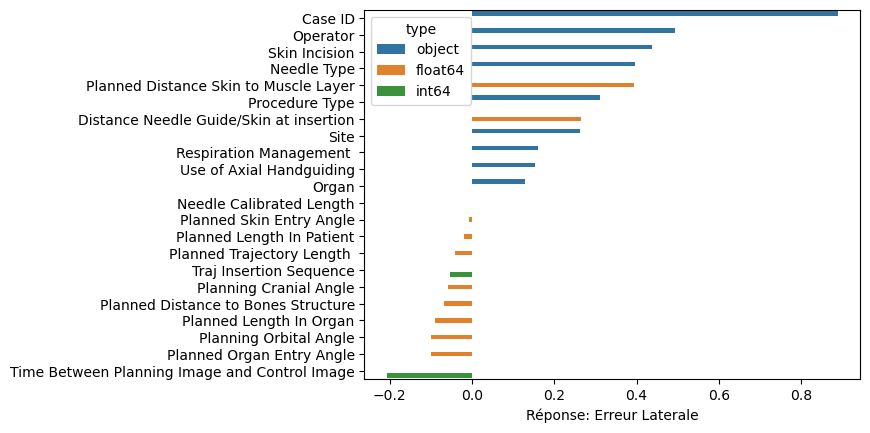

In [123]:
df=pd.DataFrame(relation_matrix[target].drop(target).sort_values(ascending=False))
df["type"]=dataset.dtypes
sns.barplot(data=df,x=target,y=df.index,hue="type",orient="h")

## Plotting of the most significant univariates variables in relation to the lateral error (above 0.3)

['Case ID', 'Operator', 'Skin Incision', 'Needle Type', 'Planned Distance Skin to Muscle Layer', 'Procedure Type', 'Distance Needle Guide/Skin at insertion', 'Site', 'Time Between Planning Image and Control Image']


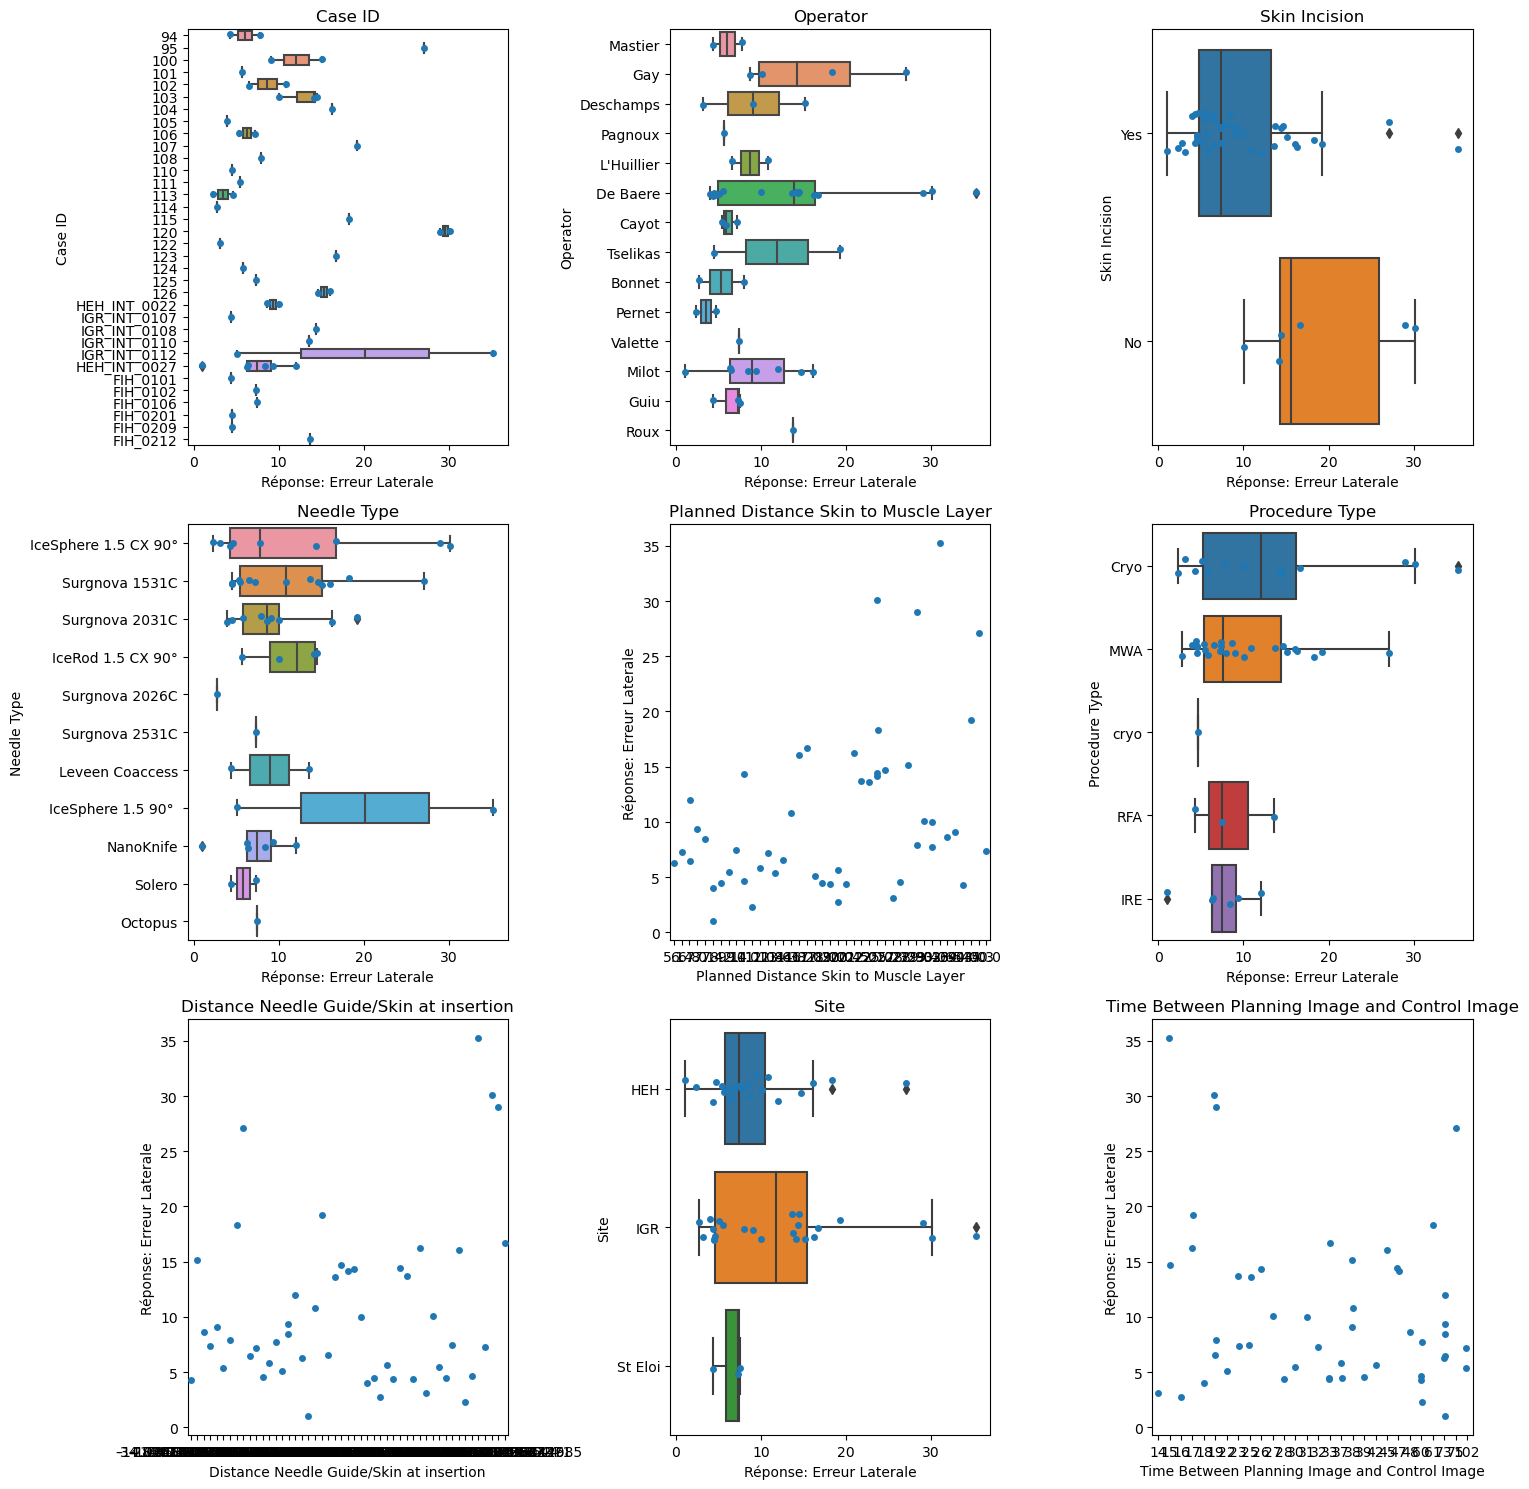

In [130]:
selected_variables=list(df[df[target].abs()>0.2].index)
print(selected_variables)

nb_axes=int(np.ceil(np.sqrt(len(selected_variables))))
fig,axes=plt.subplots(nb_axes,nb_axes,figsize=(15,15))
ax=axes.ravel()
for n,v in enumerate(selected_variables):
    if dataset[v].dtypes==object:
        sns.stripplot(data=dataset,y=v,x=target,ax=ax[n],orient="h")
        sns.boxplot(data=dataset,y=v,x=target,ax=ax[n],orient="h")
    else:
        sns.stripplot(data=dataset,x=v,y=target,ax=ax[n])
    ax[n].set_title(v)
plt.tight_layout()


<AxesSubplot: xlabel='Needle Calibrated Length', ylabel='Needle Type'>

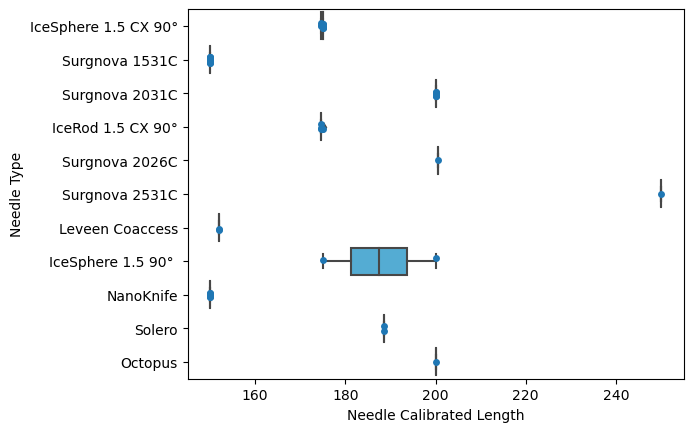

In [210]:
sns.stripplot(data=dataset,y="Needle Type",x="Needle Calibrated Length",orient="h")
sns.boxplot(data=dataset,y="Needle Type",x="Needle Calibrated Length",orient="h")

Almost all the information of the needle type is in the needle calibrated length

# First analysis

In [280]:
y=dataset[target]
var_to_remove=[target,'Planned Length In Patient','Needle Type','Case ID','Planned Trajectory Length ', 'Procedure Type','Operator']
X_categorical=dataset.drop(var_to_remove,axis=1)
# decision to remove some variables
X=pd.get_dummies(X_categorical)
# can't use Operator : too many with only one
labels, uniques=pd.factorize(dataset["Site"])

In [281]:
X.shape

(50, 23)

## Using simple PCA on onehot encoded values

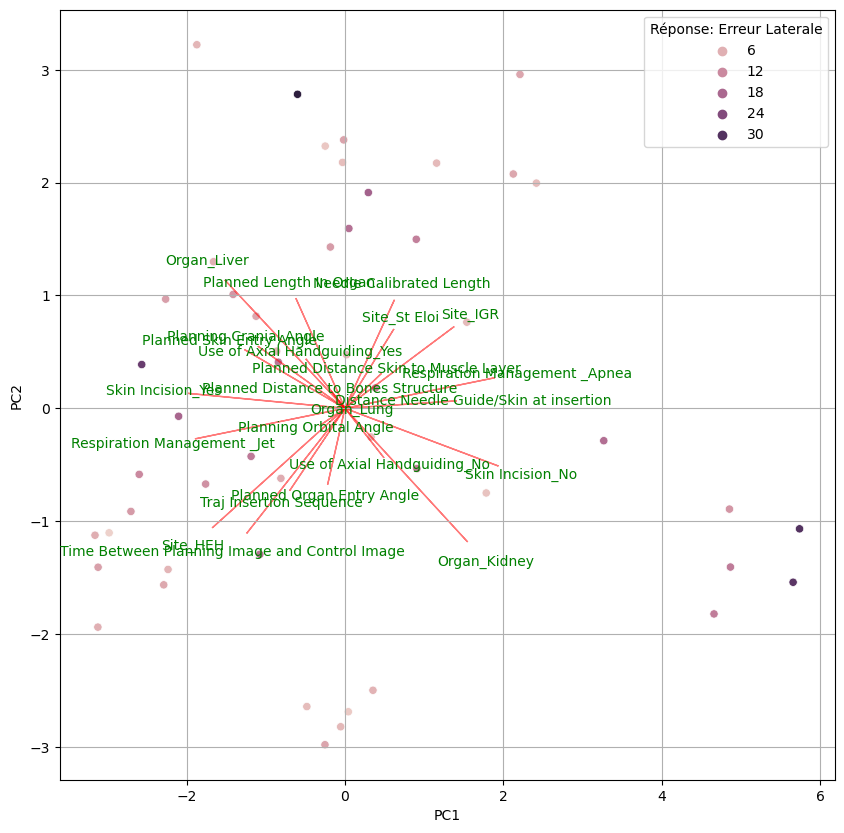

In [282]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
reload(loading_analysis)
pipe = Pipeline([("pre", StandardScaler()), ("pca", PCA(n_components=2))])
pipe.fit(X)
plt.figure(figsize=(10,10))
loading_analysis.biplot(pipe, X, y, labels=X.columns,n_max=31)
plt.show()

## Using PLSR

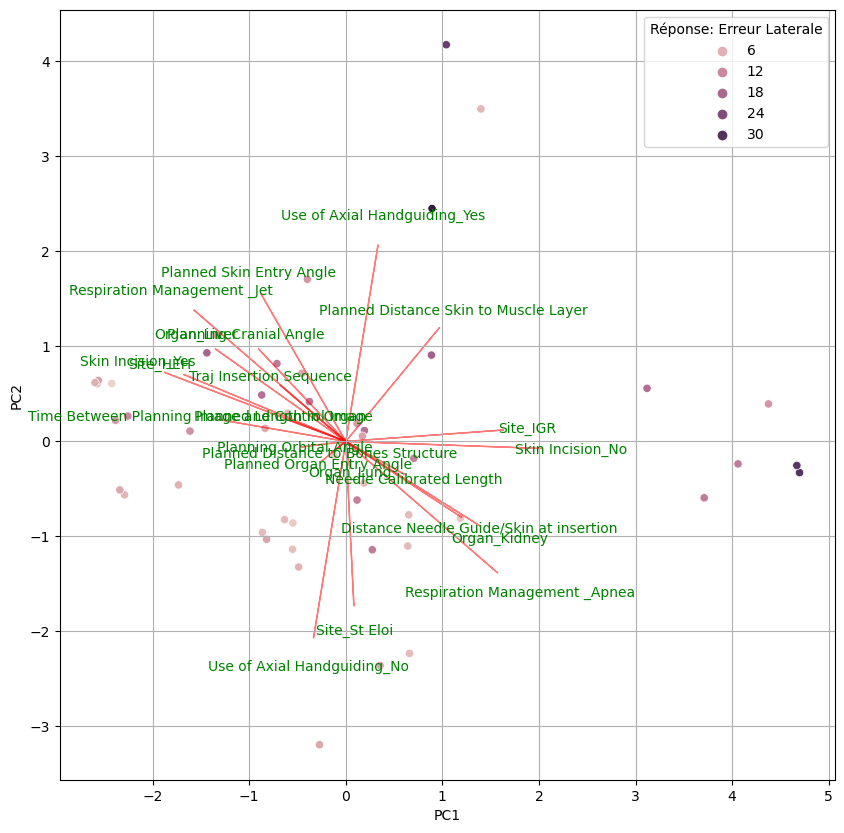

In [283]:
from sklearn.cross_decomposition import PLSRegression
pipe = Pipeline([("pre", StandardScaler()), ("pls", PLSRegression(n_components=2))])
pipe.fit(X,y)
plt.figure(figsize=(10,10))
loading_analysis.biplot(pipe, X, y, labels=X.columns,n_max=31)
plt.show()

## Evaluation using a lasso

In [335]:
def get_permutation_importance(regr,X,y):
    from sklearn.inspection import permutation_importance
    result = permutation_importance(regr, X, y, n_repeats=10, random_state=42)
    perm_sorted_idx = result.importances_mean.argsort()

    tree_importance_sorted_idx = np.argsort(regr.feature_importances_)
    tree_indices = np.arange(0, len(regr.feature_importances_)) + 0.5

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    ax1.barh(tree_indices, regr.feature_importances_[tree_importance_sorted_idx], height=0.7)
    ax1.set_yticks(tree_indices)
    ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])
    ax1.set_ylim((0, len(regr.feature_importances_)))
    ax2.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    fig.tight_layout()
    plt.show()

def apply_model_and_result(model,X,y):
    

    if type(model) is Pipeline:
        print("lasso")
        model.fit(X,y)
        try:
            df=pd.DataFrame(model[-1].coef_,index=X.columns)
        except:
            df=pd.DataFrame(model[-1].coef_)
        print("----")
        print("non-zero regression coefficients:")
        df_nonna=df[df.abs()>0.001].dropna()
        print(df_nonna)
        list_variables=df_nonna.index
    elif type(model) is RandomForestRegressor:
        from sklearn.model_selection import GridSearchCV
        parameters = {'n_estimators':np.arange(5,100,10),"max_depth":np.arange(3,7,2)}
        clf = GridSearchCV(model, parameters)
        clf.fit(X,y)
        model=clf.best_estimator_
        print(clf.best_params_)
        get_permutation_importance(model,X,y)
        list_variables=None
    from sklearn.metrics import r2_score
    y_lasso=model.predict(X)
    plt.scatter(y,y_lasso)
    print(f"R2 coefficient : {r2_score(y,y_lasso)}")
    return list_variables

R2 coefficient : 0.18998636639877264
lasso
----
non-zero regression coefficients:
                                              0
Planned Distance Skin to Muscle Layer  0.923526
Skin Incision_No                       1.225836


Index(['Planned Distance Skin to Muscle Layer', 'Skin Incision_No'], dtype='object')

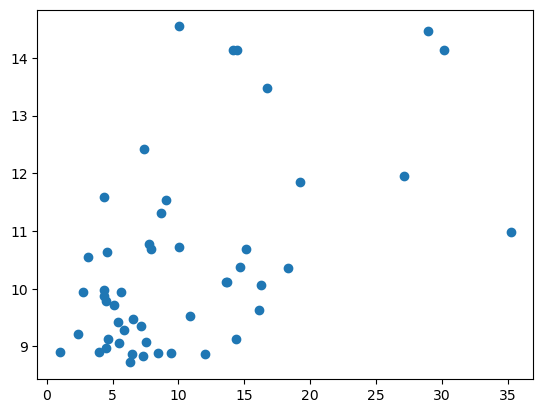

In [322]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
pipe_lasso = Pipeline([("pre", StandardScaler()), ("reg", LassoCV(max_iter=2000))])
apply_model_and_result(pipe_lasso,X,y)

Both variables are making the error increase

# Transforming the target distribution

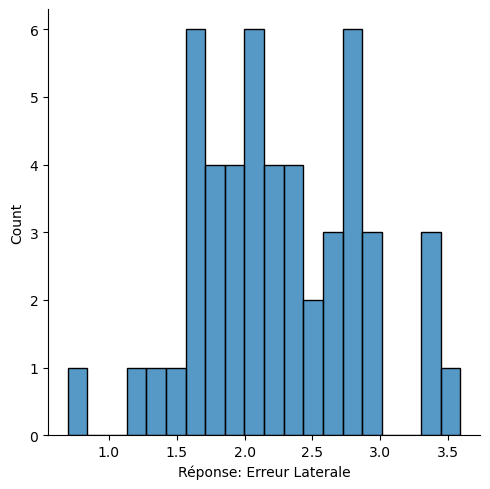

In [294]:
y_trans = np.log1p(y)
sns.displot(y_trans,bins=20)

R2 coefficient : 0.4559641106434834
----
non-zero regression coefficients:
                                                0
Needle Calibrated Length                -0.163468
Planned Organ Entry Angle               -0.036709
Planned Length In Organ                  0.011212
Planned Distance to Bones Structure     -0.041641
Planned Distance Skin to Muscle Layer    0.336913
Planning Orbital Angle                  -0.019260
Planning Cranial Angle                   0.052542
Distance Needle Guide/Skin at insertion  0.136166
Organ_Liver                              0.113554
Skin Incision_No                         0.201909


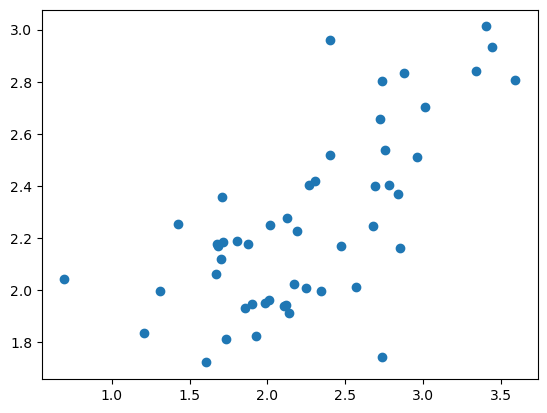

In [312]:
selected_variables=apply_model_and_result(pipe_lasso,X,y_trans)

### Using a PLSR on only these variables

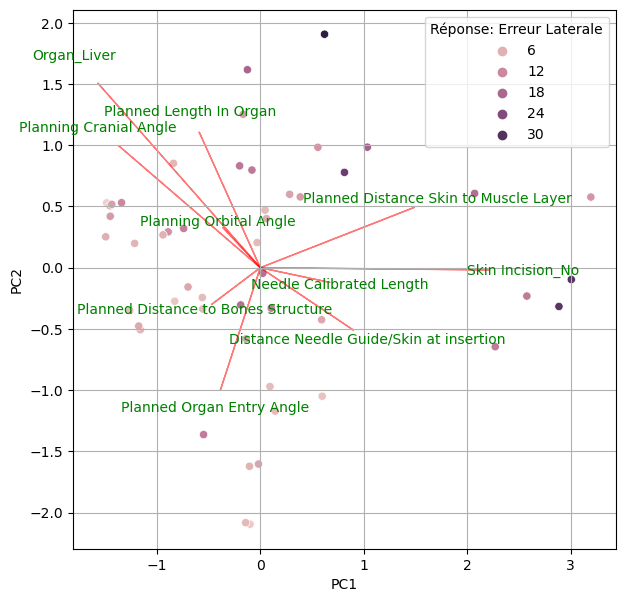

In [307]:
pipe = Pipeline([("pre", StandardScaler()), ("pls", PLSRegression(n_components=2))])
pipe.fit(X[selected_variables],y_trans)
plt.figure(figsize=(7,7))
loading_analysis.biplot(pipe, X[selected_variables],y, labels=X[selected_variables].columns,n_max=31)
plt.show()

## Using lasso using polynomial features (to take in account the cross terms)

c:\Users\rboni\miniconda3\envs\Accuracy_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e-03, tolerance: 1.575e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\rboni\miniconda3\envs\Accuracy_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e-03, tolerance: 1.575e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\rboni\miniconda3\envs\Accuracy_analysis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

R2 coefficient : 0.04250371468041192
----
non-zero regression coefficients:
            0
271 -0.016544


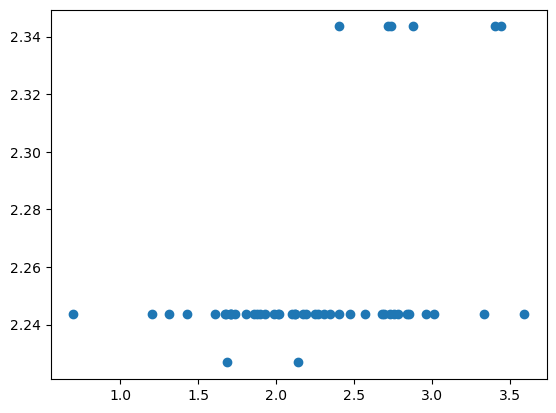

In [296]:
pipe_lasso = Pipeline([("pre", StandardScaler()),("poly",PolynomialFeatures(interaction_only=True)),("reg", LassoCV(cv=5,max_iter=2000))])
apply_model_and_result(pipe_lasso,X,y_trans)

Not converging !

# Nonlinear appraoch

{'max_depth': 5, 'n_estimators': 15}


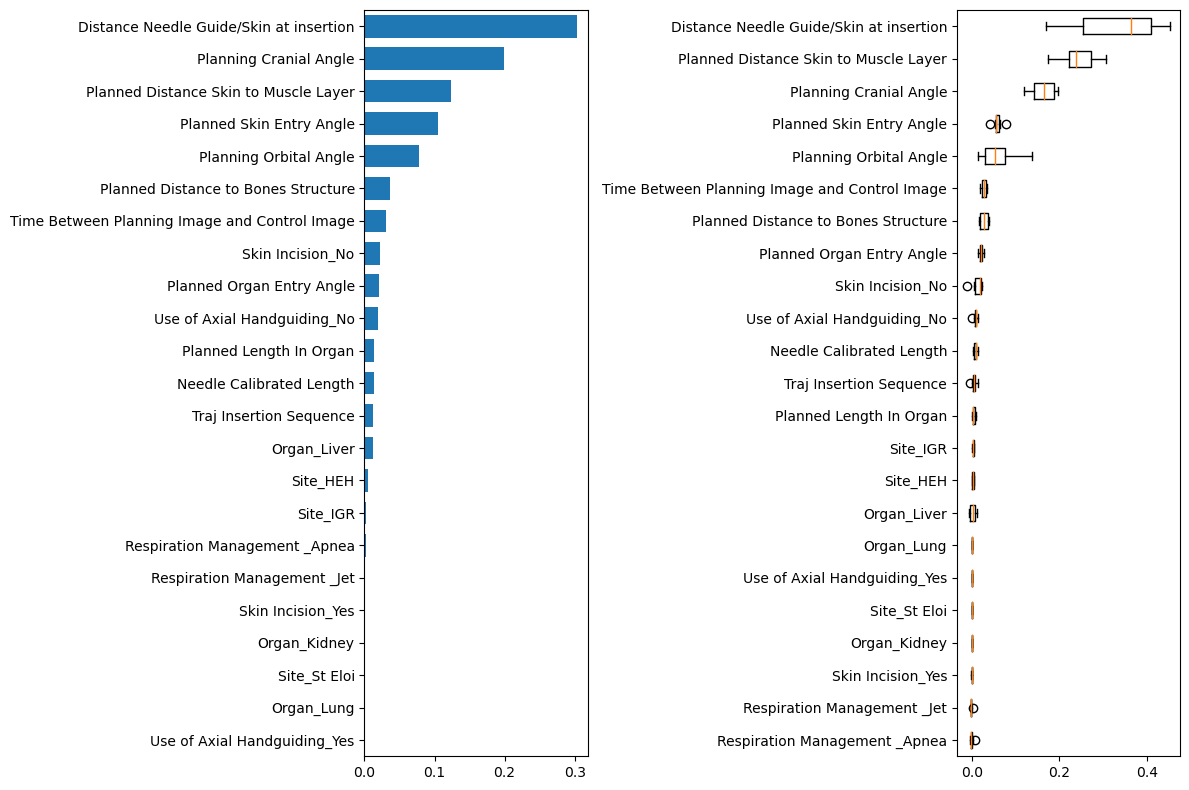

R2 coefficient : 0.8009098078674999


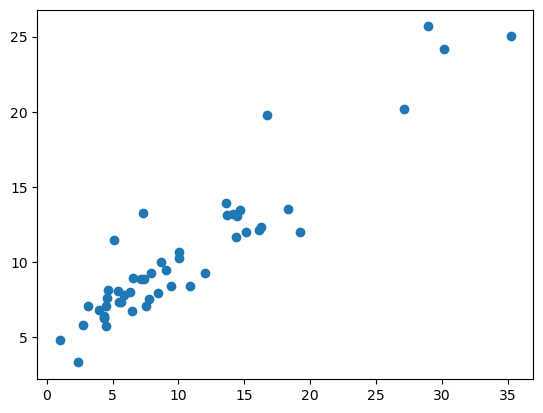

In [336]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=1, random_state=0)
# Model selection with cross validation in this function
apply_model_and_result(regr,X,y)